## EDA

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,month,year
id,1.000000,-0.016772,0.001150,0.005162,-0.012241,-0.131911,0.018608,-0.002727,0.011536,-0.023803,...,-0.005193,0.021617,-0.016925,-0.008211,-0.001798,0.020672,-0.002701,-0.138557,-0.011572,0.009915
price,-0.016772,1.000000,0.308787,0.525906,0.701917,0.089876,0.256804,0.266398,0.397370,0.036056,...,0.323799,0.053953,0.126424,-0.053402,0.306692,0.022036,0.585241,0.082845,-0.009928,0.003727
bedrooms,0.001150,0.308787,1.000000,0.514508,0.578212,0.032471,0.177944,-0.006834,0.080008,0.026496,...,0.302808,0.155670,0.018389,-0.154092,-0.009951,0.132054,0.393406,0.030690,-0.001046,-0.009949
bathrooms,0.005162,0.525906,0.514508,1.000000,0.755758,0.088373,0.502582,0.063744,0.188386,-0.126479,...,0.283440,0.507173,0.050544,-0.204786,0.024280,0.224903,0.569884,0.088303,0.007543,-0.026577
sqft_living,-0.012241,0.701917,0.578212,0.755758,1.000000,0.173453,0.353953,0.103854,0.284709,-0.059445,...,0.435130,0.318152,0.055308,-0.199802,0.052155,0.241214,0.756402,0.184342,0.012112,-0.029014
sqft_lot,-0.131911,0.089876,0.032471,0.088373,0.173453,1.000000,-0.004814,0.021632,0.074900,-0.008830,...,0.015418,0.052946,0.007686,-0.129586,-0.085514,0.230227,0.144763,0.718204,-0.002591,0.005628
floors,0.018608,0.256804,0.177944,0.502582,0.353953,-0.004814,1.000000,0.023755,0.028814,-0.264075,...,-0.245715,0.489193,0.006427,-0.059541,0.049239,0.125943,0.280102,-0.010722,0.014245,-0.022352
waterfront,-0.002727,0.266398,-0.006834,0.063744,0.103854,0.021632,0.023755,1.000000,0.401971,0.016611,...,0.080559,-0.026153,0.092873,0.030272,-0.014306,-0.041904,0.086507,0.030781,0.008148,-0.004168
view,0.011536,0.397370,0.080008,0.188386,0.284709,0.074900,0.028814,0.401971,1.000000,0.045999,...,0.277078,-0.053636,0.103951,0.084622,0.005871,-0.078107,0.280681,0.072904,-0.005398,0.001268
condition,-0.023803,0.036056,0.026496,-0.126479,-0.059445,-0.008830,-0.264075,0.016611,0.045999,1.000000,...,0.173849,-0.361592,-0.060788,0.002888,-0.015102,-0.105877,-0.093072,-0.003126,0.022388,-0.045898


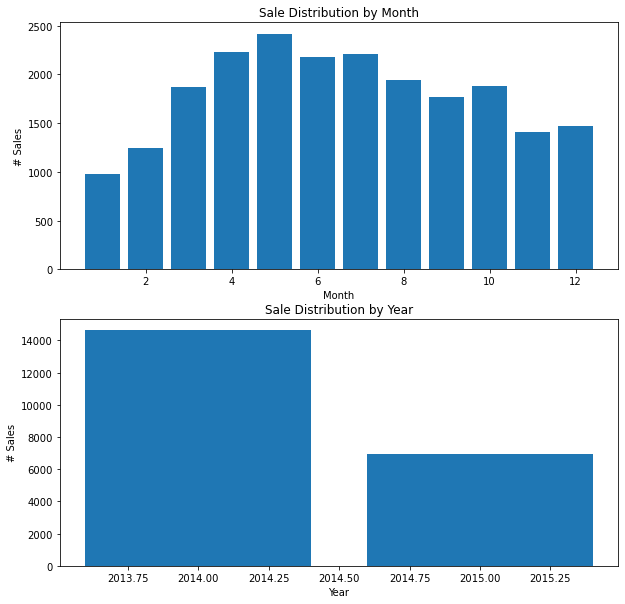

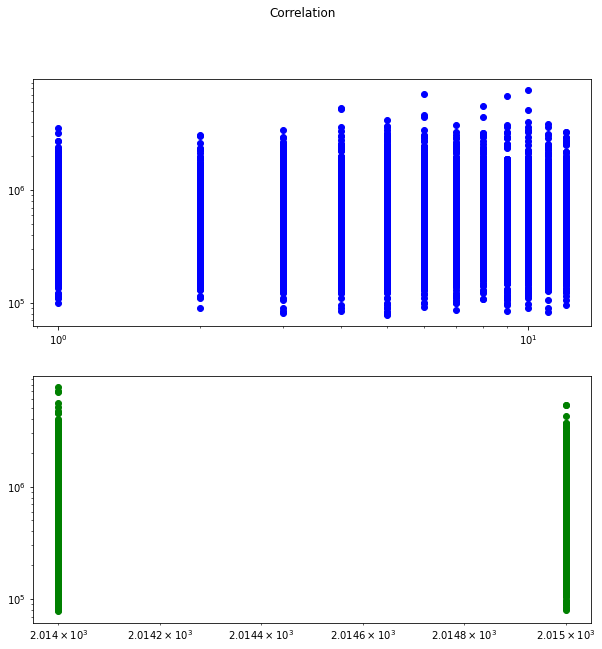

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression
#1
df = pd.read_csv('kc_house_data.csv')
df['month'] = pd.DatetimeIndex(df['date']).month
df['year'] = pd.DatetimeIndex(df['date']).year
month = df['month'].value_counts()
year = df['year'].value_counts()

f, (m, y) = plt.subplots(2, figsize=(10,10))
m.bar(month.index.tolist(), month)
m.set_title('Sale Distribution by Month')
m.set_xlabel('Month')
m.set_ylabel('# Sales')
y.bar(year.index.tolist(), year)
y.set_title('Sale Distribution by Year')
y.set_xlabel('Year')
y.set_ylabel('# Sales')

# Correlation Plots
f, (price_month, price_year) = plt.subplots(2, figsize=(10,10))
f.suptitle('Correlation')
price_month.scatter(df['month'], df['price'], c='b')
price_month.set_xscale('log')
price_month.set_yscale('log')

price_year.scatter(df['year'], df['price'], c='g')
price_year.set_xscale('log')
price_year.set_yscale('log')

df.corr(method='pearson')
# Month - Price : -0.009928
# Year - Price : 0.003727


(2). Sale numbers Vs. (years,months) and Sale prices correlation Vs. (years,months)

Text(0.5, 1.0, '2014 and 2015 sale numbers')

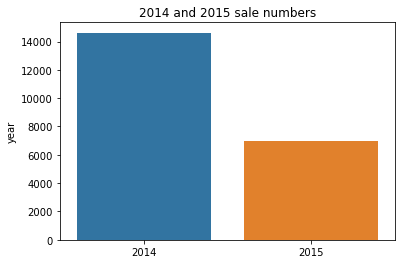

In [11]:
sns.barplot(year.index.tolist(),year)
plt.title("2014 and 2015 sale numbers")

Text(0.5, 1.0, 'sale numbers in each month')

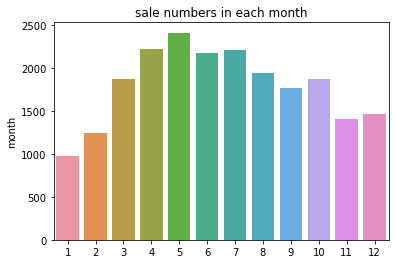

In [12]:
sns.barplot(month.index.tolist(),month)
plt.title("sale numbers in each month")

Text(0.5, 1.0, 'Price vs. Year')

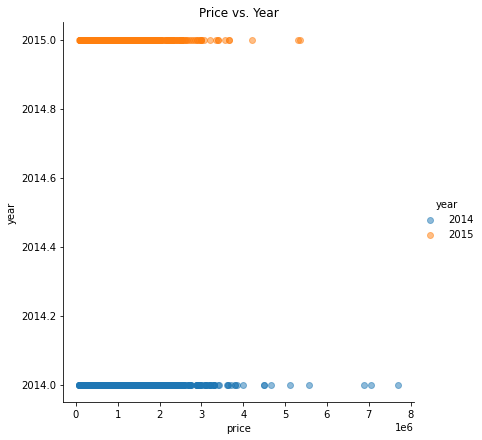

In [13]:
g=sns.FacetGrid(df,hue='year',height=6)
g.map(plt.scatter,'price','year',alpha=0.5)
g.add_legend()
plt.title("Price vs. Year")

Text(0.5, 1.0, 'Price vs. month')

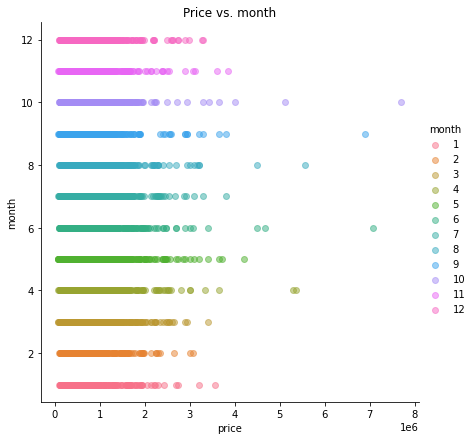

In [14]:
g=sns.FacetGrid(df,hue='month',height=6)
g.map(plt.scatter,'price','month',alpha=0.5)
g.add_legend()
plt.title("Price vs. month")

In [15]:
print("Price correlation with year: ",df['price'].corr(df['year']))
print("Price correlation with month: ",df['price'].corr(df['month']))

Price correlation with year:  0.003727139624315499
Price correlation with month:  -0.009928289245273971


In [16]:
#3

(4). Create the scoring function for 'Grade' with accuracy:70%

In [17]:
X=df[['price','bedrooms','bathrooms','sqft_living15','sqft_lot15','floors','waterfront',"condition","yr_built","zipcode","view",
      "yr_renovated"]]
y=df['grade']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [18]:
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train,y_train)
y_predit=clf.predict(X_test)

In [19]:
variables = pd.Series(clf.feature_importances_,index=X.columns).sort_values(ascending=False)
variables

sqft_living15    0.205185
price            0.201843
yr_built         0.144822
sqft_lot15       0.129422
zipcode          0.097274
bathrooms        0.091033
floors           0.042855
bedrooms         0.038364
condition        0.022564
view             0.015838
yr_renovated     0.009478
waterfront       0.001323
dtype: float64

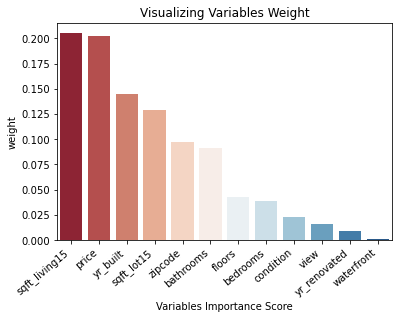

In [20]:
ax=sns.barplot(x=variables.index, y=variables,palette=sns.color_palette("RdBu", 12))
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
# Add labels to your graph
plt.xlabel('Variables Importance Score')
plt.ylabel('weight')
plt.title("Visualizing Variables Weight")
plt.show()

In [21]:
print("Scoring function accuracy:",metrics.accuracy_score(y_test, y_predit))

Scoring function accuracy: 0.696604938271605


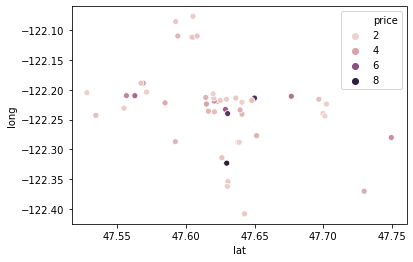

In [22]:
#5
import seaborn as sns

wealthy = df.loc[df['price'] >= 3000000]

ax = sns.scatterplot(x=wealthy.lat, y=wealthy.long, hue=wealthy.price)


## Modeling

### Linder Regression

In [23]:
X=df[['bedrooms','bathrooms','sqft_living15','sqft_lot15','floors','waterfront',"condition","yr_built","zipcode","view",
      "yr_renovated"]]
y=df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

Text(0.5, 1.0, 'distribution of house prices')

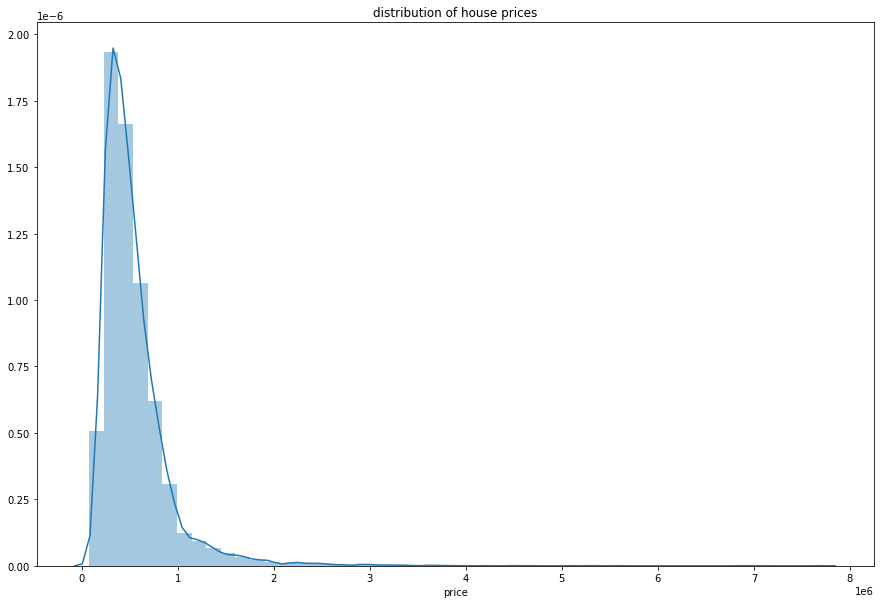

In [24]:
plt.figure(figsize=(15,10))
plt.tight_layout()
sns.distplot(df['price'])
plt.title("distribution of house prices")

In [25]:
reg = LinearRegression()
reg.fit(X_train,y_train)
coeff_df = pd.DataFrame(reg.coef_, X.columns, columns=['Coefficient'])
coeff_df

,Coefficient
bedrooms,-12120.917473
bathrooms,183117.736343
sqft_living15,218.645248
sqft_lot15,-0.215418
floors,65898.117757
waterfront,591990.936643
condition,24741.026942
yr_built,-3410.384515
zipcode,213.391078
view,66268.292328


In [26]:
y_predit = reg.predict(X_test)
accurate_rate=1-np.mean(np.abs(y_predit-y_test)/y_test)
print("Accuracy: ",accurate_rate)


Accuracy:  0.6581691980190123


In [27]:
result = pd.DataFrame({'Actual price': y_test, 'Predicted price': y_predit})
result.head(8)

,Actual price,Predicted price
17638,350000.0,482206.152708
18100,645000.0,618117.943206
18431,270000.0,398418.025604
17117,315000.0,330537.018089
4773,390000.0,356214.444452
12120,375000.0,438507.213078
19157,890000.0,645657.297701
12553,213800.0,105442.606456


Model accuracy:  0.6581691980190123


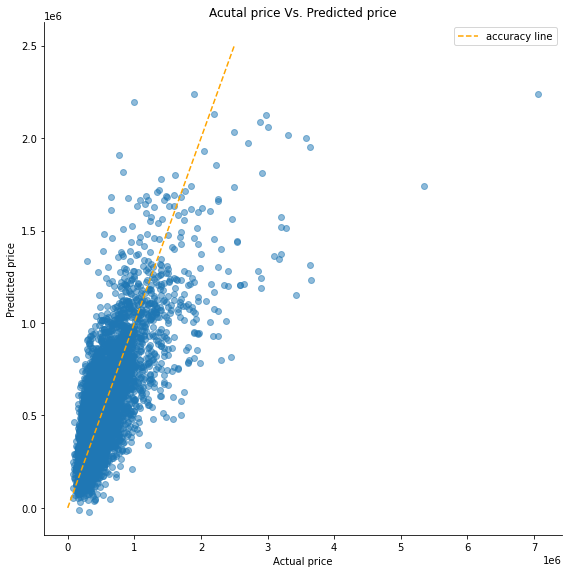

In [28]:
g = sns.FacetGrid(result,height=8)
g.map(plt.scatter,'Actual price','Predicted price',alpha=0.5)
plt.plot([0,2500000],[0,2500000],ls='--',color='orange',label='accuracy line')
plt.title("Acutal price Vs. Predicted price")
plt.legend()
print("Model accuracy: ",accurate_rate)

Linear regression is a model to find possible W, in "Y= XW+error" which has minimum Mean squared error(MSE). This linear regression model accuracy rate is around 66%.

### Random Forest Model

In [29]:
X=df[['bedrooms','bathrooms','sqft_living15','sqft_lot15','floors','waterfront',"condition","yr_built","zipcode","view",
      "yr_renovated"]]
y=df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
clf = RandomForestRegressor(n_estimators=100)
clf.fit(X_train,y_train)
y_predit=clf.predict(X_test)

In [30]:
variables = pd.Series(clf.feature_importances_,index=X.columns).sort_values(ascending=False)
variables

sqft_living15    0.369577
bathrooms        0.192557
zipcode          0.132420
yr_built         0.084848
sqft_lot15       0.080346
view             0.046378
waterfront       0.039408
bedrooms         0.018187
floors           0.014184
yr_renovated     0.011667
condition        0.010426
dtype: float64

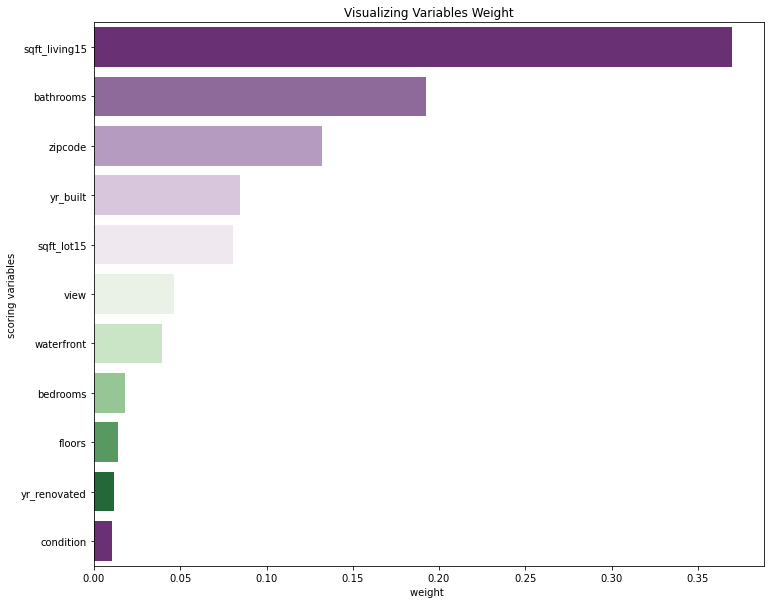

In [47]:
ax=sns.barplot(x=variables, y=variables.index,palette=sns.color_palette("PRGn", 10))
ax.figure.set_size_inches(12,10)
# Add labels to your graph
plt.xlabel('weight ')
plt.ylabel('scoring variables')
plt.title("Visualizing Variables Weight")
plt.show()

In [46]:
accurate_rate=1-np.mean(np.abs(y_predit-y_test)/y_test)
print("Random Forest accuracy:",accurate_rate)

Random Forest accuracy: 0.8081079949703387


Random forest regression is to select random samples and build decision trees for each sample. Then, Perform a vote for each predicted result and select the prediction result with the most votes as the final prediction. The Random forest model has accuracy rate around 81%.

